# Convolutional neural networks

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # CPU

import cv2 as cv
#from tfcv import * # a helper library that contain some useful functions 

## Convolutional filters

Convolutional filters are small windows that run over each pixel of the image and compute weighted average of the neighboring pixels.

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

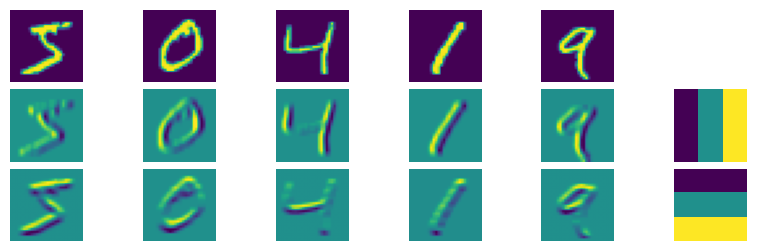

In [9]:
vertical_filter = np.array([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]])
horizontal_filter = np.array([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]])

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(10,3))
fig.subplots_adjust(hspace=0.1)

for img,ax in zip(x_train[:5,:,:],axs[0,:]):
    ax.imshow(img)
    ax.axis("off")
axs[0,-1].axis("off")

for img,ax in zip(x_train[:5,:,:],axs[1,:]):
    ax.imshow(cv.filter2D(img,-1,vertical_filter))
    ax.axis("off")
axs[1,-1].imshow(vertical_filter)
axs[1,-1].axis("off")

for img,ax in zip(x_train[:5,:,:],axs[2,:]):
    ax.imshow(cv.filter2D(img,-1,horizontal_filter))
    ax.axis("off")
axs[2,-1].imshow(horizontal_filter)
axs[2,-1].axis("off")

plt.show()

## Convolutional layers

Convolutional layers are defined using Conv2d class. We need to specify the following:
* <code>filters</code> - number of filters to use. We will use 9 different filters, which will give the network plenty of opportunities to explore which * filters work best for our scenario.
* <code>kernel_size</code> is the size of the sliding window. Usually 3x3 or 5x5 filters are used

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, 
                        kernel_size=(5,5), 
                        input_shape=(28,28,1),# the last is the channel : WxHxC
                        activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 9)         234       
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                51850     
                                                                 
Total params: 52084 (203.45 KB)
Trainable params: 52084 (203.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
print(x_train.shape)
print(np.expand_dims(x_train,3).shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [5]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)

In [14]:
hist = model.fit(x_train_c,y_train,
                 validation_data=(x_test_c,y_test),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0889 - acc: 0.9752 - val_loss: 0.0665 - val_acc: 0.9797
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0661 - acc: 0.9811 - val_loss: 0.0538 - val_acc: 0.9816
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0561 - acc: 0.9840 - val_loss: 0.0519 - val_acc: 0.9835


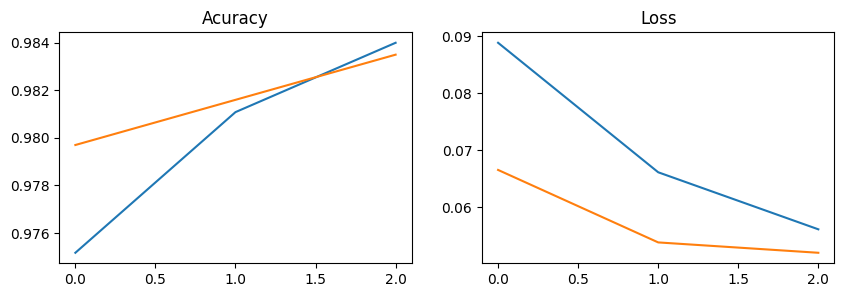

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axs[0].plot(hist.history["acc"])
axs[0].plot(hist.history["val_acc"])
axs[0].set_title("Acuracy")

axs[1].plot(hist.history["loss"])
axs[1].plot(hist.history["val_loss"])
axs[1].set_title("Loss")

plt.show()

In [33]:
# l = model.layers[0].weights[0]
# l[...,0,i]

## Multi-layered CNNs and pooling layers

Once we have detected there is a horizontal stoke within sliding 3x3 window, it is not so important at which exact pixel it occurred. Thus we can "scale down" the size of the image, which is done using one of the pooling layers:
* **Average Pooling** takes a sliding window (for example, 2x2 pixels) and computes an average of values within the window
* **Max Pooling replaces** the window with the maximum value. The idea behind max pooling is to detect a presence of a certain pattern within the sliding window.

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, 
                        kernel_size=(5,5), 
                        input_shape=(28,28,1),
                        activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, 
                        kernel_size=(5,5), 
                        activation='relu'),
    keras.layers.MaxPooling2D(),    
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 20)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 10)                3

In [6]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_test_c,y_test),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2145 - acc: 0.9371 - val_loss: 0.0706 - val_acc: 0.9765
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0710 - acc: 0.9785 - val_loss: 0.0471 - val_acc: 0.9847
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0516 - acc: 0.9841 - val_loss: 0.0446 - val_acc: 0.9852


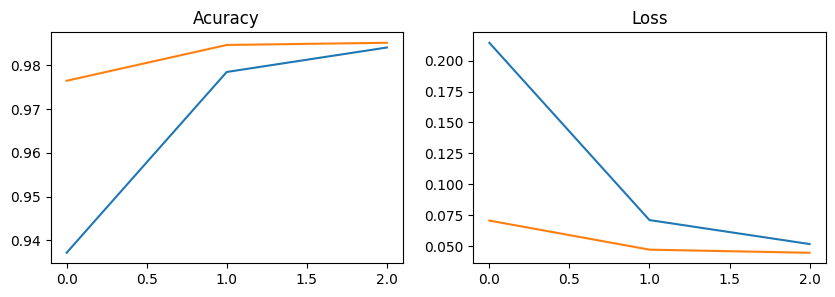

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axs[0].plot(hist.history["acc"])
axs[0].plot(hist.history["val_acc"])
axs[0].set_title("Acuracy")

axs[1].plot(hist.history["loss"])
axs[1].plot(hist.history["val_loss"])
axs[1].set_title("Loss")

plt.show()

## Build model for CIFAR-10 dataset

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 196s 1us/step


In [15]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

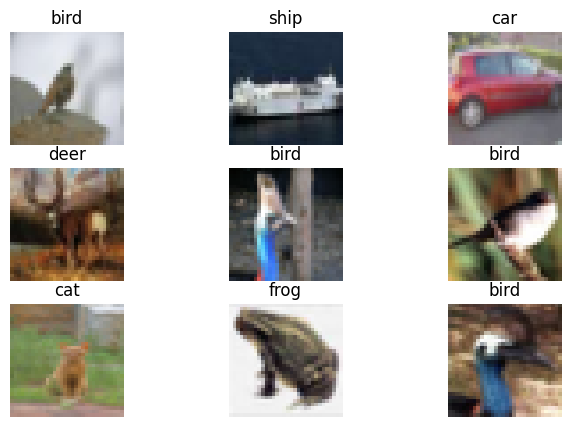

In [47]:
figure = plt.figure(figsize=(8, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = tf.random.uniform(shape=(),
                                   minval=1,
                                   maxval=len(x_train),
                                   dtype=tf.int32).numpy() 
    img= x_train[sample_idx]
    label = y_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label.item()])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [48]:
# LeNET model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, 
                        kernel_size = 5, 
                        strides = 1, 
                        activation = 'relu', 
                        input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, 
                        kernel_size = 5, 
                        strides = 1, 
                        activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(84, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [49]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=["acc"])

In [50]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_test,y_test),
                 epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.6167 - acc: 0.4072 - val_loss: 1.3983 - val_acc: 0.4896
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3444 - acc: 0.5133 - val_loss: 1.3334 - val_acc: 0.5268
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2370 - acc: 0.5579 - val_loss: 1.2400 - val_acc: 0.5554
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1632 - acc: 0.5872 - val_loss: 1.2222 - val_acc: 0.5620
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1081 - acc: 0.6068 - val_loss: 1.1582 - val_acc: 0.5911
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0557 - acc: 0.6262 - val_loss: 1.1429 - val_acc: 0.5961
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0108 - acc: 0.6411 - val_loss: 1.1977 - val_acc: 0.5772
Epoch 8/10
1563/1563 [============================

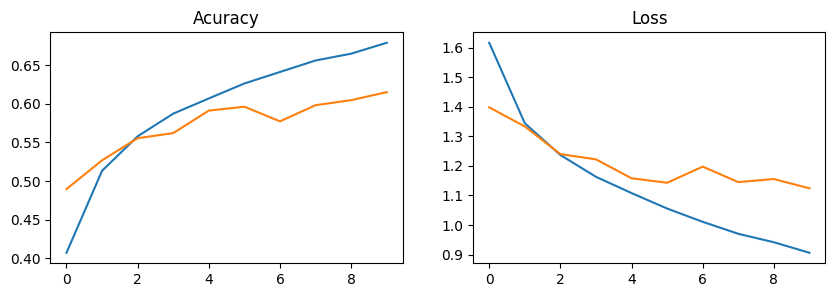

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axs[0].plot(hist.history["acc"])
axs[0].plot(hist.history["val_acc"])
axs[0].set_title("Acuracy")

axs[1].plot(hist.history["loss"])
axs[1].plot(hist.history["val_loss"])
axs[1].set_title("Loss")

plt.show()